# Import modules + define routines & EPICS channels

In [2]:
%matplotlib nbagg
import numpy as np
import json
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy.special import erf
from scipy.optimize import curve_fit
import os

In [3]:
def LoadData_knife_edge(filename):
    with h5py.File(filename, 'r') as BS_file:
        pulse_ids = BS_file[channel_pulse_ids][:]
        reprate_FEL = ((pulse_ids%4 == 0) & (pulse_ids%8 != 0))                #This is for 25 Hz
        reprate_laser = pulse_ids%8 == 0                                       #This is for 12.5 Hz
        
        Data_pumped = BS_file[channel_PIPS_fluo][:][reprate_laser]
        Data_unpumped = BS_file[channel_PIPS_fluo][:][reprate_FEL]
        
        DataT_pumped = BS_file[channel_PIPS_trans][:][reprate_laser]
        DataT_unpumped = BS_file[channel_PIPS_trans][:][reprate_FEL]
        
        Izero_pump = BS_file[channel_Izero][:][reprate_laser]
        Izero_unpump = BS_file[channel_Izero][:][reprate_FEL]
        
        Energy = BS_file[channel_energy][:][reprate_FEL]
        Position = BS_file[channel_position][:][reprate_FEL]
        #Position = BS_file[channel_laser_pitch][:][reprate_FEL]
        Palm = BS_file[channel_palm_analysis][:][reprate_FEL]
        
    return Data_pumped, Data_unpumped, Izero_pump, Izero_unpump, Energy, Position, DataT_pumped, DataT_unpumped, Palm

def errfunc(x, a, b, c, d):
    return a + b*erf((c-x)*np.sqrt(np.log(2))/(np.abs(d)))

def biexp(x, baseline, amplitude, t0, width, a1, t1, a2, t2):
    return baseline + amplitude*(1-erf((t0-x)*np.sqrt(np.log(2))/(np.abs(width))))*(a1*np.exp(-x/t1)+a2*np.exp(-x/t2))

In [4]:
# only through raw and JF

channel_PIPS_trans = "data/SARES11-GES1:CH1_VAL_GET/data"           #X-ray diode to PRIME Keysight
channel_PIPS_fluo = "data/SARES11-GES1:CH2_VAL_GET/data"           #X-ray diode to PRIME Keysight
channel_Izero = "data/SARES11-LSCP10-FNS:CH2:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 3)
channel_Izero2 = "data/SARES11-LSCP10-FNS:CH3:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 0)
channel_Izero3 = "data/SARES11-LSCP10-FNS:CH1:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 1)
channel_Izero4 = "data/SARES11-LSCP10-FNS:CH2:VAL_GET/data"         #Izero diode to PRIME Ioxos (channel 2)
channel_LaserDiode = "data/SLAAR11-LSCP1-FNS:CH0:VAL_GET/data"      #Laser diode to ESA Laser Ioxos 
channel_Laser_refDiode = "data/SLAAR11-LSCP1-FNS:CH2:VAL_GET/data"  #Laser diode leaking from beampath, to ESA Laser Ioxos 
#channel_LaserDiode = "SARES11-GES1:CH2_VAL_GET/data"          #Laser diode to PRIME Keysight
channel_pulse_ids = "data/SLAAR11-LMOT-M451:ENC_1_BS/pulse_id"      #Pulse ids taken from pump-probe delay stage (100 Hz)
channel_delay = "data/SLAAR11-LMOT-M451:ENC_1_BS/data"              #Delay of pump-probe delay stage
channel_LAM_delaystage = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV2_NBS/data"       #LAM internal stage position in mm
channel_LAM_stepper = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV10_NBS/data"         #LAM stepper motor (used for feedback)
channel_waveplate= "data/SLAAR11-LTIM01-EVR0:DUMMY_PV8_NBS/data"         #LAM stepper motor (used for feedback)
channel_PALM_eTOF = "data/SAROP11-PALMK118:CH2_BUFFER/data"                 #PALM eTof from Ch2

#Position of the stage: Dummy PV1 for x axis, dummy PV3 for y axis
channel_position = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV1_NBS/data"     #Huber stage X position. 
channel_position = "data/SLAAR11-LMOT-M451:ENC_1_BS/data"
channel_energy = "data/SLAAR11-LTIM01-EVR0:DUMMY_PV3_NBS/data"       #Energy from the monochromator
channel_laser_yaw= "data/SLAAR11-LTIM01-EVR0:DUMMY_PV2_NBS/data"
channel_laser_pitch= "data/SLAAR11-LTIM01-EVR0:DUMMY_PV4_NBS/data"
channel_palm_analysis= "data/SAROP11-PALMK118:ANALYSIS_PALM_DEL/data"     # Palm analysis probably fs ????


In [ ]:
# #For BS local

# channel_PIPS_trans = "SARES11-GES1:CH1_VAL_GET/data"           #X-ray diode to PRIME Keysight
# channel_PIPS_fluo = "SARES11-GES1:CH2_VAL_GET/data"           #X-ray diode to PRIME Keysight
# channel_Izero = "SARES11-LSCP10-FNS:CH2:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 3)
# channel_Izero2 = "SARES11-LSCP10-FNS:CH3:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 0)
# channel_Izero3 = "SARES11-LSCP10-FNS:CH1:VAL_GET/data"          #Izero diode to PRIME Ioxos (channel 1)
# channel_Izero4 = "SARES11-LSCP10-FNS:CH2:VAL_GET/data"         #Izero diode to PRIME Ioxos (channel 2)
# channel_LaserDiode = "SLAAR11-LSCP1-FNS:CH0:VAL_GET/data"      #Laser diode to ESA Laser Ioxos 
# channel_Laser_refDiode = "SLAAR11-LSCP1-FNS:CH2:VAL_GET/data"  #Laser diode leaking from beampath, to ESA Laser Ioxos 
# #channel_LaserDiode = "SARES11-GES1:CH2_VAL_GET/data"          #Laser diode to PRIME Keysight
# channel_pulse_ids = "SLAAR11-LMOT-M451:ENC_1_BS/pulse_id"      #Pulse ids taken from pump-probe delay stage (100 Hz)
# channel_delay = "SLAAR11-LMOT-M451:ENC_1_BS/data"              #Delay of pump-probe delay stage
# channel_LAM_delaystage = "SLAAR11-LTIM01-EVR0:DUMMY_PV2_NBS/data"       #LAM internal stage position in mm
# channel_LAM_stepper = "SLAAR11-LTIM01-EVR0:DUMMY_PV10_NBS/data"         #LAM stepper motor (used for feedback)
# channel_waveplate= "SLAAR11-LTIM01-EVR0:DUMMY_PV8_NBS/data"         #LAM stepper motor (used for feedback)
# channel_PALM_eTOF = "SAROP11-PALMK118:CH2_BUFFER/data"                 #PALM eTof from Ch2

# #Position of the stage: Dummy PV1 for x axis, dummy PV3 for y axis
# channel_position = "SLAAR11-LTIM01-EVR0:DUMMY_PV1_NBS/data"     #Huber stage X position. 
# channel_position = "SLAAR11-LMOT-M451:ENC_1_BS/data"
# channel_energy = "SLAAR11-LTIM01-EVR0:DUMMY_PV3_NBS/data"       #Energy from the monochromator
# channel_laser_yaw= "SLAAR11-LTIM01-EVR0:DUMMY_PV2_NBS/data"
# channel_laser_pitch= "SLAAR11-LTIM01-EVR0:DUMMY_PV4_NBS/data"
# channel_palm_analysis= "data/SAROP11-PALMK118:ANALYSIS_PALM_DEL/data"     # Palm analysis probably fs ????


# Scan name

In [65]:
scan_name ="FeBpy_monoscan_350nm_10uJ_500fs_005"
#scan_name ="CytC_Fe3_timescan_7p5uJ_350nm_7122eV_016"

# file names of the type below. copy paste for ease:
# FEL_knife_edge_Y_coarse_
# FEL_knife_edge_X_coarse_
# FEL_knife_edge_Y_fine_
# FEL_knife_edge_X_fine_

DIR = "/sf/alvra/data/p17803/raw/scan_data/" + scan_name + "/"
DIR_json = "/sf/alvra/data/p17803/res/scan_info/"

# Analyse full run

In [32]:
!ls -lah -rt $DIR
!hostname

listfile = os.listdir(DIR)
number_files = len(listfile)
print ("There are",number_files,"files in the folder", DIR)

total 479G
-rw-r--r--.   1 17803 p17803  18G Jan 31 13:58 FeBpy_monoscan_350nm_5uJ_1ps_001_step0000.JF02T09V01.h5
-rw-r--r--.   1 root  p17803 5.8M Jan 31 13:58 FeBpy_monoscan_350nm_5uJ_1ps_001_step0000.BSREAD_CA.h5
-rw-r--r--.   1 17803 p17803  18G Jan 31 13:59 FeBpy_monoscan_350nm_5uJ_1ps_001_step0001.JF02T09V01.h5
-rw-r--r--.   1 root  p17803 827M Jan 31 14:00 FeBpy_monoscan_350nm_5uJ_1ps_001_step0000.BSREAD.h5
-rw-r--r--.   1 root  p17803 5.8M Jan 31 14:00 FeBpy_monoscan_350nm_5uJ_1ps_001_step0001.BSREAD_CA.h5
-rw-r--r--.   1 17803 p17803  18G Jan 31 14:01 FeBpy_monoscan_350nm_5uJ_1ps_001_step0002.JF02T09V01.h5
-rw-r--r--.   1 root  p17803 827M Jan 31 14:01 FeBpy_monoscan_350nm_5uJ_1ps_001_step0001.BSREAD.h5
-rw-r--r--.   1 root  p17803 5.6M Jan 31 14:01 FeBpy_monoscan_350nm_5uJ_1ps_001_step0002.BSREAD_CA.h5
-rw-r--r--.   1 17803 p17803  18G Jan 31 14:02 FeBpy_monoscan_350nm_5uJ_1ps_001_step0003.JF02T09V01.h5
-rw-r--r--.   1 root  p17803 827M Jan 31 14:03 FeBpy_monoscan_350nm_5uJ_1

In [66]:
json_file = DIR_json + scan_name + "_scan_info.json"
print (json_file)

with open(json_file) as file:
    data = json.load(file)
numFiles = len(data['scan_files'])
#numFiles = 1

print ("Processing",numFiles,"files")

Signal_pump = []
Signal_unpump = []
Signal_diff = []
err_signal_pump = []
err_signal_unpump = []
err_signal_diff = []

SignalT_pump = []
SignalT_unpump = []
err_signalT_pump = []

Izero_pump = []
Izero_unpump = []
err_Izero = []
Izero_loop = []

Position_mm = []
Energy_eV = []

Palm_fs = []

for i in range(0,numFiles):
    filename = str(data['scan_files'][i][0])    
    exists = os.path.isfile(filename)
    if exists: #and i!=5:
        print("step",i+1,"of",numFiles,": Processing %s" % (str(data['scan_files'][i][0])))
        (signal_pump_loop,signal_unpump_loop,Izero_pump_loop, Izero_unpump_loop,energy_loop,position_loop,\
         signalT_pump_loop,signalT_unpump_loop, palm_loop) = LoadData_knife_edge(str(data['scan_files'][i][0]))
        
        threshold_pump = Izero_pump_loop > 1000
        threshold_unpump = Izero_unpump_loop > 1000 
        condition_pump = Izero_pump_loop > np.median(Izero_pump_loop)-1.2*(np.std(Izero_pump_loop))
        condition_unpump = Izero_unpump_loop > np.median(Izero_unpump_loop)-1.2*(np.std(Izero_unpump_loop))

        signal_pump_loop = signal_pump_loop[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
        Izero_pump_loop = Izero_pump_loop[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
        
        signal_unpump_loop = signal_unpump_loop[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
        Izero_unpump_loop = Izero_unpump_loop[condition_pump & condition_unpump & threshold_pump & threshold_unpump]
        
        signal_pump_loop_norm = signal_pump_loop / Izero_pump_loop
        signal_unpump_loop_norm = signal_unpump_loop / Izero_unpump_loop
        signal_diff_loop = signal_unpump_loop / Izero_unpump_loop
        
        Signal_pump.append(signal_pump_loop_norm.mean())
        Signal_unpump.append(signal_unpump_loop_norm.mean())
        Signal_diff.append(signal_diff_loop.mean())
        
        
        #Signal_pump.append(np.mean(signal_pump_loop))
        #Signal_unpump.append(signal_unpump_loop.mean())
        #err_signal_pump.append(signal_pump_loop.std()/np.sqrt(signal_pump_loop.size))
        #err_signal_unpump.append(signal_unpump_loop.std()/np.sqrt(signal_unpump_loop.size))
        
        #signal_pump_loop_norm = signal_pump_loop / Izero_pump_loop
        
        err_signal_pump.append(signal_pump_loop_norm.std()/np.sqrt(signal_pump_loop_norm.size))
        err_signal_unpump.append(signal_unpump_loop_norm.std()/np.sqrt(signal_unpump_loop_norm.size))
        err_signal_diff.append(signal_diff_loop.std()/np.sqrt(signal_diff_loop.size))
        
        #Izero_pump.append(Izero_pump_loop.mean())
        #Izero_unpump.append(Izero_unpump_loop.mean())
        #err_Izero_pump.append(Izero_pump_loop.std()/np.sqrt(Izero_pump_loop.size))
        #err_Izero_unpump.append(Izero_unpump_loop.std()/np.sqrt(Izero_unpump_loop.size))
        
        
        SignalT_pump.append(np.mean(signalT_pump_loop))
        SignalT_unpump.append(signalT_unpump_loop.mean())
        err_signalT_pump.append(signalT_pump_loop.std()/np.sqrt(signalT_pump_loop.size))
        
        energy_loop = [x for x in energy_loop if (np.abs(x) > 0)]
        Energy_eV.append(np.mean(energy_loop))
        Position_mm.append(np.mean(position_loop))
        Palm_fs.append(np.mean(palm_loop))
        
        print (signal_pump_loop.size,signal_unpump_loop.size,np.mean(energy_loop))
    
Signal_pump = np.asarray(Signal_pump)
Signal_unpump = np.asarray(Signal_unpump)
Signal_diff = np.asarray(Signal_diff)

err_signal_pump = np.asarray(err_signal_pump)
err_signal_unpump = np.asarray(err_signal_unpump)
err_signal_diff = np.asarray(err_signal_diff)

err_signal_pump_relative = np.asarray(err_signal_pump)/Signal_pump
err_signal_unpump_relative = np.asarray(err_signal_unpump)/Signal_unpump

SignalT_pump = np.asarray(SignalT_pump)
SignalT_unpump = np.asarray(SignalT_unpump)
err_signalT_pump = np.asarray(err_signalT_pump)

Izero_pump = np.asarray(Izero_pump)
Izero_unpump = np.asarray(Izero_unpump)
err_Izero = np.asarray(err_Izero)

Energy_eV = np.asarray(Energy_eV)
Position_mm = np.asarray(Position_mm)
Palm_fs =np.asarray(Palm_fs)
Delay_ps = (Position_mm - 150.365)*2/(3e8*1e3*1e-12) # change to right t0 !
print ("Job done!")

/sf/alvra/data/p17803/res/scan_info/FeBpy_monoscan_350nm_10uJ_500fs_005_scan_info.json
Processing 29 files
step 1 of 29 : Processing /sf/alvra/data/p17803/raw/scan_data/FeBpy_monoscan_350nm_10uJ_500fs_005/FeBpy_monoscan_350nm_10uJ_500fs_005_step0000.BSREAD.h5
844 844 7103.987172937449
step 2 of 29 : Processing /sf/alvra/data/p17803/raw/scan_data/FeBpy_monoscan_350nm_10uJ_500fs_005/FeBpy_monoscan_350nm_10uJ_500fs_005_step0001.BSREAD.h5
830 830 7104.497088031085
step 3 of 29 : Processing /sf/alvra/data/p17803/raw/scan_data/FeBpy_monoscan_350nm_10uJ_500fs_005/FeBpy_monoscan_350nm_10uJ_500fs_005_step0002.BSREAD.h5
844 844 7104.967617046984
step 4 of 29 : Processing /sf/alvra/data/p17803/raw/scan_data/FeBpy_monoscan_350nm_10uJ_500fs_005/FeBpy_monoscan_350nm_10uJ_500fs_005_step0003.BSREAD.h5
856 856 7105.520240119973
step 5 of 29 : Processing /sf/alvra/data/p17803/raw/scan_data/FeBpy_monoscan_350nm_10uJ_500fs_005/FeBpy_monoscan_350nm_10uJ_500fs_005_step0004.BSREAD.h5
837 837 7105.99407492407

In [67]:
Signal_pump_norm = Signal_pump #/ Izero_pump
Signal_unpump_norm = Signal_unpump #/ Izero_unpump

SignalT_pump_norm = SignalT_pump #/ Izero_pump
SignalT_unpump_norm = SignalT_unpump #/ Izero_unpump

#Signal_pump_norm = np.log(-(Signal_pump / Izero_pump))
#Signal_unpump_norm = np.log(-(Signal_unpump / Izero_unpump))


#Signal_pump = Signal_pump 
#Signal_unpump_norm = Signal_unpump 

err_signal_pump_norm = err_signal_pump #/ Izero_pump
err_signal_unpump_norm = err_signal_unpump #/ Izero_unpump

#err_signal_pump_relative_norm = err_signal_pump_relative / Izero_pump
#err_signal_unpump_relative_norm = err_signal_unpump_relative / Izero_unpump

#err_signalT_norm = err_signalT_pump / Izero_pump

In [13]:
# Optional to run --> it returns the maximum value of the trace
#m=max(Signal_pump_norm-Signal_unpump_norm)
#print(m)
#[i for i, j in enumerate(Signal_pump_norm-Signal_unpump_norm) if j==m] # returns the location in x axis indexes of the max
#print(Energy_eV[15])
#print(Position_mm)

# Plot Energy Scans

<IPython.core.display.Javascript object>


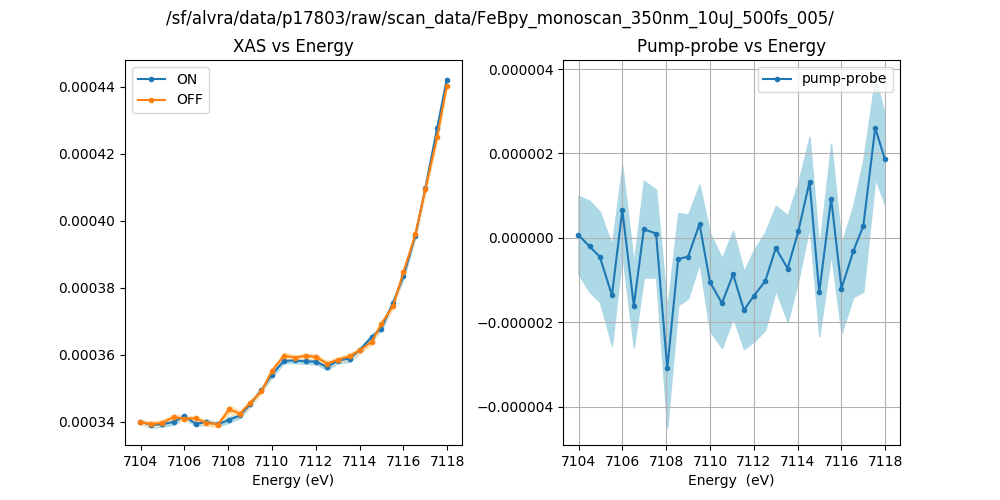

In [68]:
plt.figure(figsize = (10,5))
plt.suptitle(DIR, fontsize=12)
scale=1
#plt.title(DIR,horizontalalignment='right')
low_err_pump= Signal_pump_norm - err_signal_pump_norm
high_err_pump= Signal_pump_norm + err_signal_pump_norm
low_err_unpump= Signal_unpump_norm - err_signal_unpump_norm
high_err_unpump= Signal_unpump_norm + err_signal_unpump_norm

#low_err_diff= Signal_pump_norm-Signal_unpump_norm-0.01*np.sqrt(low_err_pump**2 + low_err_unpump**2)
#high_err_diff= Signal_pump_norm-Signal_unpump_norm+0.01*np.sqrt(high_err_pump**2 + high_err_unpump**2)

#low_err_diff= (Signal_pump_norm-Signal_unpump_norm) - err_signal_pump_relative_norm
#high_err_diff= (Signal_pump_norm-Signal_unpump_norm) + err_signal_unpump_relative_norm

low_err_diff= (Signal_pump_norm-Signal_unpump_norm) - np.sqrt(err_signal_pump_norm**2+err_signal_unpump_norm**2)
high_err_diff= (Signal_pump_norm-Signal_unpump_norm) + np.sqrt(err_signal_pump_norm**2+err_signal_unpump_norm**2)

plt.subplot(1,2,1)
plt.plot(Energy_eV, scale*Signal_pump_norm, label="ON",marker='.')
plt.plot(Energy_eV, scale*Signal_unpump_norm, label="OFF",marker='.')
plt.fill_between(Energy_eV, scale*low_err_pump, scale*high_err_pump, color='lightblue')
plt.fill_between(Energy_eV, scale*low_err_unpump, scale*high_err_unpump, color='navajowhite')
plt.xlabel("Energy (eV)")
plt.gca().set_title('XAS vs Energy')
plt.legend(loc="best")

plt.subplot(1,2,2)
plt.plot(Energy_eV, scale*(Signal_pump_norm-Signal_unpump_norm), label="pump-probe",marker='.')
plt.fill_between(Energy_eV, scale*low_err_diff, scale*high_err_diff, color='lightblue')
plt.grid()
plt.xlabel("Energy  (eV)")
plt.gca().set_title('Pump-probe vs Energy')
plt.legend(loc="best")
#plt.plot(Position_mm, [-0.00000005]*len(Energy_eV) , label="OFF")



#plt.xlabel("Energy (eV)")
plt.legend(loc="best")
plt.subplots_adjust(wspace = 0.3,hspace = 0.5) 

plt.show()

#plt.savefig('Timescan_7_diode')

In [69]:
saveDir = 'Saved_XAS_Febpy/'

fn = str(saveDir + scan_name + "_processed_XAS.h5")
hf = h5py.File(fn, 'w')

hf.create_dataset('energy_eV', data=Energy_eV)
hf.create_dataset('signal_pump', data=Signal_pump_norm)
hf.create_dataset('err_signal_pump', data=err_signal_pump_norm)
hf.create_dataset('signal_unpump', data=Signal_unpump_norm)
hf.create_dataset('err_signal_unpump', data=err_signal_unpump_norm)
hf.create_dataset('signal_pp', data=Signal_pump_norm-Signal_unpump_norm)

hf.close()

# Plot Energy Scans

In [ ]:
plt.figure(figsize = (10,5))
plt.suptitle(DIR, fontsize=12)
scale=1e5
#plt.title(DIR,horizontalalignment='right')
low_err_pump= Signal_pump_norm - err_signal_pump_norm
high_err_pump= Signal_pump_norm + err_signal_pump_norm
low_err_unpump= Signal_unpump_norm - err_signal_unpump_norm
high_err_unpump= Signal_unpump_norm + err_signal_unpump_norm

#low_err_diff= Signal_pump_norm-Signal_unpump_norm-0.01*np.sqrt(low_err_pump**2 + low_err_unpump**2)
#high_err_diff= Signal_pump_norm-Signal_unpump_norm+0.01*np.sqrt(high_err_pump**2 + high_err_unpump**2)

low_err_diff= (Signal_pump_norm-Signal_unpump_norm) - np.sqrt(err_signal_pump_norm**2+err_signal_unpump_norm**2)
high_err_diff= (Signal_pump_norm-Signal_unpump_norm) + np.sqrt(err_signal_pump_norm**2+err_signal_unpump_norm**2)

plt.subplot(2,2,1)
plt.plot(Energy_eV, scale*Signal_pump_norm, label="ON",marker='.')
plt.plot(Energy_eV, scale*Signal_unpump_norm, label="OFF",marker='.')
plt.fill_between(Energy_eV, scale*low_err_pump, scale*high_err_pump, color='lightblue')
plt.fill_between(Energy_eV, scale*low_err_unpump, scale*high_err_unpump, color='navajowhite')
plt.xlabel("Energy (eV)")
plt.gca().set_title('XAS vs Position (x1e5)')
plt.legend(loc="best")

plt.subplot(2,2,2)
plt.plot(Energy_eV, scale*(Signal_pump_norm-Signal_unpump_norm), label="pump-probe",marker='.')
plt.fill_between(Energy_eV, scale*low_err_diff, scale*high_err_diff, color='lightblue')
plt.grid()
plt.xlabel("Position (mm)")
plt.gca().set_title('Pump-probe vs Position (x1e5)')
plt.legend(loc="best")
#plt.plot(Position_mm, [-0.00000005]*len(Energy_eV) , label="OFF")

plt.subplot(2,2,3)
plt.plot(Delay_ps, scale*Signal_pump_norm, label="ON",marker='.')
plt.plot(Delay_ps, scale*Signal_unpump_norm, label="OFF",marker='.')
plt.fill_between(Delay_ps, scale*low_err_pump, scale*high_err_pump, color='lightblue')
plt.fill_between(Delay_ps, scale*low_err_unpump, scale*high_err_unpump, color='navajowhite')
plt.xlabel("Delay (ps)")
plt.gca().set_title('XAS vs delay (x1e5)')
plt.legend(loc="best")

plt.subplot(2,2,4)
plt.plot(Delay_ps, scale*(Signal_pump_norm-Signal_unpump_norm), label="pp",marker='.')
plt.fill_between(Delay_ps, scale*low_err_diff, scale*high_err_diff, color='lightblue')
plt.grid()
plt.xlabel("Delay (ps)")
plt.gca().set_title('XAS vs delay (x1e5)')


#plt.xlabel("Energy (eV)")
plt.legend(loc="best")
plt.subplots_adjust(wspace = 0.3,hspace = 0.5) 
plt.show()

# save the pp sig and its xaxis into a variable name after the scan name. 
# This is convenient to compare different scans together, see cell below.
x = scan_name + "_DIFF"
t = scan_name + "_ENERGY"
vars()[x] = (Signal_pump_norm-Signal_unpump_norm)
vars()[t] = Energy_eV

#plt.savefig('Timescan_7_diode')


# Compare runs - time scans

In [12]:
%matplotlib nbagg
import numpy as np
import json
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy.special import erf
from scipy.optimize import curve_fit
import os

def errfunc(x, a, b, c, d):
    return a + b*erf((c-x)*np.sqrt(np.log(2))/(np.abs(d)))

def exp(x, baseline, amplitude, t0, width, a1, t1):
    return baseline + amplitude*(1-erf((t0-x)*np.sqrt(np.log(2))/(np.abs(width))))*(a1*np.exp(-x/t1))

def biexp(x, baseline, amplitude, t0, width, a1, t1, a2, t2):
    return baseline + amplitude*(1-erf((t0-x)*np.sqrt(np.log(2))/(np.abs(width))))*(a1*np.exp(-x/t1)+a2*np.exp(-x/t2))

In [13]:
def errfunc(x, a, b, c, d):
    return a + b*erf((c-x)*np.sqrt(np.log(2))/(np.abs(d)))

def biexp(x, baseline, amplitude, t0, width, a1, t1, a2, t2):
    return baseline + amplitude*(1-erf((t0-x)*np.sqrt(np.log(2))/(np.abs(width))))*(a1*np.exp(-x/t1)+a2*np.exp(-x/t2))

In [17]:
LOADDIR = "/das/work/p17/p17803/Processed_files/"
h5f = h5py.File(LOADDIR + 'timescan_16_7122eV_CytCFe3','r') 

xscan16 = h5f['Delay'][:]
yscan16 = h5f['XAS'][:]
# fit16= h5f['Fit'][:]

xaxis1= xscan16
yaxis1= yscan16


h5f.close()


OSError: Unable to open file (unable to lock file, errno = 11, error message = 'Resource temporarily unavailable')

In [ ]:
#xaxis3
yaxis3

In [ ]:
from scipy.interpolate import interp1d
from scipy import interpolate


# We plot traces together
plt.figure()
plt.plot(xaxis1, yaxis1, label="data_timescan_350nm",marker='.')
plt.plot(xaxis1, fit_16, label="fit_timescan_350nm",marker='.')
#plt.plot(xaxis2+0.06, yaxis2, label="XES_scan011",marker='.')
#plt.plot(xaxis3, yaxis3, label="XES_scan013",marker='.')
plt.grid()
plt.xlabel("Delay (ps)")
plt.gca().set_title('XAS vs delay')
plt.legend(loc="best")
plt.show()


plt.figure(figsize=(5,9))
plt.subplots_adjust(hspace=0.5)
# plt.subplot(311)
# plt.imshow(RIXS_scan10, aspect = 'auto', cmap = "rainbow", origin ="lower", vmin=-0.012, vmax=0.006)
# plt.title("RIXS transient scan 10")
# plt.colorbar()
# plt.show()

# plt.subplot(312)
# plt.imshow(RIXS_scan11, aspect = 'auto', cmap = "rainbow", origin ="lower", vmin=-0.012, vmax=0.006)
# plt.title("RIXS transient scan 11")
# plt.colorbar()
# plt.show()

#plt.subplot(313)
# plt.imshow(RIXS_scan13, aspect = 'auto', cmap = "rainbow", origin ="lower", vmin=-0.012, vmax=0.006)
# plt.title("RIXS transient scan 13")
# plt.colorbar()
# plt.show()


In [ ]:
xaxis2new=xaxis2+0.06
xaxis3new=xaxis3+0.07

In [ ]:

#Ka2_11 = RIXS_scan11[0:50, 110:120]
Ka2_13 = RIXS_scan13[0:38, 70:94]
xaxis3new=xaxis3[0:38]

# plt.figure()
# plt.imshow(RIXS_scan11, aspect = 'auto', cmap = "rainbow", origin ="lower", vmin=-0.012, vmax=0.006)
# plt.title("RIXS transient scan 11")
# plt.colorbar()
# plt.show()

plt.figure()
plt.imshow(RIXS_scan13, aspect = 'auto', cmap = "rainbow", origin ="lower", vmin=-0.012, vmax=0.006)
plt.title("RIXS transient scan 12")
plt.colorbar()
plt.show()

# plt.figure()
# plt.imshow(Ka2_11, aspect = 'auto', cmap = "rainbow", origin ="lower", vmin=-0.012, vmax=0.006)
# plt.title("ROI transient scan 11")
# plt.colorbar()
# plt.show()

plt.figure()
plt.imshow(Ka2_13, aspect = 'auto', cmap = "rainbow", origin ="lower", vmin=-0.012, vmax=0.006)
plt.title("ROI transient scan 12")
plt.colorbar()
plt.show()



ka2_13sum = -Ka2_13.mean(axis=1)
#ka2_11sum = -Ka2_11.mean(axis=1)
timeps = (xaxis3new - 151.281)*2/(3e8*1e3*1e-12) # change to right t0 !


plt.figure()
#plt.plot(timeps,ka2_11sum, label="XES_scan011",marker='.')
plt.plot(timeps,ka2_13sum, label="XES_scan012",marker='.')
plt.legend(loc="best")


#ka211_norm=ka2_11sum/np.max(ka2_11sum)
ka213_norm=ka2_13sum/np.max(ka2_13sum)



#y_ave=(ynew1+ynew2)/2
#y_ave_ka2=(ka212_norm+ka212_norm)/2
#y_ave=(ynew2_norm+ynew3_norm)/2


plt.figure()
plt.plot(timeps,ka213_norm, label="XES_scan011",marker='.')
plt.title("Ka2 transient average of scans 11 and 12")
plt.xlabel("Delay time (ps)")





In [ ]:
y1 = yaxis1
x1 = xaxis1
f1 = interp1d(x1, y1, kind='linear')

y2 = yaxis2
x2 = xaxis2new
f2 = interp1d(x2, y2, kind='linear')

y3 = yaxis3
x3 = xaxis3new
f3 = interp1d(x3, y3, kind='linear')

#linear interpolation
xnew = np.linspace(151.5, 152.3, num=100, endpoint=True)
ynew1=f1(xnew)
ynew2=f2(xnew)
ynew3=f3(xnew)

#Normalization
ynew1_norm=ynew1/np.max(ynew1)
ynew2_norm=ynew2/np.max(ynew2)
ynew3_norm=ynew3/np.max(ynew3)

#Average
y_ave=(ynew1_norm+ynew2_norm+ynew3_norm)/3


Delay_ps = (xnew - 151.68)*2/(3e8*1e3*1e-12) # change to right t0 !

# FIT WITH BI EXPONENTIAL

parameters_ave,extras = curve_fit(biexp, Delay_ps, y_ave, p0 = [0.00, 1, 1, 0.1, 0.0001, .5, 5.0, 20.]) # [baseline, step amplitude, center, FWHM]

print("Parameters for interpolated data")
print("Position t0 =",np.abs(np.round(parameters_ave[2],3)),"ps")
print("Width =",np.abs(np.round(parameters_ave[3],3)),"ps")
print("a1 =",np.abs(np.round(parameters_ave[4],3)))
print("t1 =",np.abs(np.round(parameters_ave[5],3)),"ps")
print("a2 =",np.abs(np.round(parameters_ave[6],3)))
print("t2 =",np.abs(np.round(parameters_ave[7],3)),"ps")



plt.figure()
plt.plot(Delay_ps,y_ave, label="XES_scan average 10-12",marker='.')

plt.plot(Delay_ps, biexp(Delay_ps,parameters_ave[0],parameters_ave[1],parameters_ave[2],parameters_ave[3],parameters_ave[4],\
                       parameters_ave[5],parameters_ave[6],parameters_ave[7]))

plt.grid()
plt.xlabel("Position (mm)")
plt.gca().set_title('XES vs delay')
plt.legend(loc="best")
plt.show()


In [ ]:
#y1 = yaxis1
#x1 = xaxis1
#f1 = interp1d(x1, y1, kind='linear')

y2 = yaxis2
x2 = xaxis2new
#f2 = interp1d(x2, y2, kind='linear')

y3 = yaxis3
x3 = xaxis3new
#f3 = interp1d(x3, y3, kind='linear')

#linear interpolation
xnew = xaxis2#np.linspace(151, 155, num=100, endpoint=True)
#ynew1=f1(xnew)
#ynew2=f2(xnew)
#ynew3=f3(xnew)


#ynew1_norm=ynew1/np.max(ynew1)
ynew2_norm=y2/np.max(y2)
ynew3_norm=y3/np.max(ynew3)


#y_ave=(ynew1+ynew2)/2
#y_ave=(ynew1_norm+ynew2_norm+ynew3_norm)/3
y_ave=(ynew2_norm+ynew3_norm)/2


Delay_ps = (xnew - 151.68)*2/(3e8*1e3*1e-12) # change to right t0 !


# FIT WITH MONO EXPONENTIAL

parameters_ave,extras = curve_fit(exp, Delay_ps, y_ave, p0 = [0.020, 0.8, 1, 0.1, 0.0001,3]) # [baseline, step amplitude, center, FWHM]

print("Parameters for interpolated data")
print("Position t0 =",np.abs(np.round(parameters_ave[2],3)),"ps")
print("Width =",np.abs(np.round(parameters_ave[3],3)),"ps")
print("a1 =",np.abs(np.round(parameters_ave[4],3)))
print("t1 =",np.abs(np.round(parameters_ave[5],3)),"ps")


plt.figure()
plt.plot(Delay_ps,y_ave, label="XES_scan average 11-12",marker='.')


plt.plot(Delay_ps, exp(Delay_ps,parameters_ave[0],parameters_ave[1],parameters_ave[2],parameters_ave[3],parameters_ave[4],\
                       parameters_ave[5]))

plt.grid()
plt.xlabel("Position (mm)")
plt.gca().set_title('XES vs delay')
plt.legend(loc="best")
plt.show()

# Compare runs - mono scans

In [ ]:
%matplotlib nbagg
import numpy as np
import json
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy.special import erf
from scipy.optimize import curve_fit
import os

def errfunc(x, a, b, c, d):
    return a + b*erf((c-x)*np.sqrt(np.log(2))/(np.abs(d)))

def exp(x, baseline, amplitude, t0, width, a1, t1):
    return baseline + amplitude*(1-erf((t0-x)*np.sqrt(np.log(2))/(np.abs(width))))*(a1*np.exp(-x/t1))

def biexp(x, baseline, amplitude, t0, width, a1, t1, a2, t2):
    return baseline + amplitude*(1-erf((t0-x)*np.sqrt(np.log(2))/(np.abs(width))))*(a1*np.exp(-x/t1)+a2*np.exp(-x/t2))

In [7]:

LOADDIR = "/das/work/p17/p17803/Processed_files/"
h5f = h5py.File(LOADDIR + 'monoscan_5_500fs_CytCFe3','r') 

xscan5 = h5f['Energy'][:]
yscan5 = h5f['Signal'][:]


h5f.close()

In [ ]:
from scipy.interpolate import interp1d
from scipy import interpolate

#monoscan_001 350nm
xaxis1= xscan1
yaxis1= yscan1

#monoscan_004 350nm
xaxis4= xscan4
yaxis4= yscan4

#monoscan_005 350nm
xaxis5= xscan5
yaxis5= yscan5

y1_norm=(yscan1+0.000003)/np.max(yscan1+0.000003)
y4_norm=yscan4/np.max(yscan4)
y5_norm=yscan5/np.max(yscan5)

#y_ave45=(y4_norm+y4_norm+y5_norm)/2
y_ave145=(y1_norm+y4_norm+y4_norm+y5_norm)/3

#monoscan009 288nm
xaxis9= xscan9
yaxis9= yscan9
y9_norm=yscan9/np.max(yscan9)

# We plot mono traces together at 350nm
plt.figure(figsize=(7,4))
plt.plot(xaxis1, yaxis1+0.000003, label="monoscan_001_350nm",marker='.')
plt.plot(xaxis4, yaxis4, label="monoscan_004_350nm",marker='.')
plt.plot(xaxis5, yaxis5, label="monoscan_005_350nm",marker='.')
plt.grid()
plt.xlabel("Energy (Ev)")
plt.gca().set_title('XAS on/off vs energy')
plt.legend(loc="best")
plt.show()


# We plot mono traces normalized together at 350nm
plt.figure(figsize=(7,4))
plt.plot(xaxis1, y1_norm, label="monoscan_001_350nm",marker='.')
plt.plot(xaxis4, y4_norm, label="monoscan_004_350nm",marker='.')
plt.plot(xaxis5, y5_norm, label="monoscan_005_350nm",marker='.')
plt.plot(xaxis4, y_ave145, label="monoscan_avg_1_4_5_350nm",marker='.', color ='red')
plt.grid()
plt.xlabel("Energy (Ev)")
plt.gca().set_title('XAS on/off vs energy')
plt.legend(loc="best")
plt.show()


# # We plot the average of the energy scans
# plt.figure(figsize=(7,4))
# plt.plot(xaxis4, y_ave145, label="monoscan_avg_1_4_5_350nm",marker='.', color ='red')
# plt.grid()
# plt.xlabel("Energy (Ev)")
# plt.gca().set_title('XAS on/off vs energy')
# plt.legend(loc="best")
# plt.show()


plt.figure(figsize=(7,4))
# plt.plot(xaxis1, yaxis1+0.000003, label="monoscan_001_350nm",marker='.')
# plt.plot(xaxis4, yaxis4, label="monoscan_004_350nm",marker='.')
# plt.plot(xaxis5, yaxis5, label="monoscan_005_350nm",marker='.')
plt.plot(xaxis9, y9_norm, label="monoscan_009_288nm",marker='.', color = 'red')
plt.plot(xaxis4, y_ave145, label="monoscan_avg_1_4_5_350nm",marker='.', color = 'blue')
plt.grid()
plt.xlabel("Energy (Ev)")
plt.gca().set_title('288nm vs 350nm XAS difference')
plt.legend(loc="best")
plt.show()


# plt.figure(figsize=(7,4))
# #plt.plot(xaxis1, (yaxis1+0.000003)/np.max(yaxis1+0.000003), label="monoscan_1_350nm",marker='.')
# #plt.plot(xaxis4, yaxis4/np.max(yaxis4), label="monoscan_4_350nm",marker='.')
#plt.plot(xaxis4, y_ave45, label="monoscan_avg_4_5_350nm",marker='.')
# plt.plot(xaxis9, yaxis9/np.max(yaxis9), label="monoscan_9_288nm",marker='.', color = 'red')
# plt.grid()
# plt.xlabel("Energy (Ev)")
# plt.gca().set_title('288nm vs 350nm XAS difference')
# plt.legend(loc="best")
# plt.show()


# More stuff

In [ ]:
myList = np.concatenate((np.arange(7100,7105,1), np.arange(7105,7120,0.5), np.arange(7120,7160,1),np.arange(7160,7200,3)))

In [ ]:
time_zero = 150.188         #this is in mm from the delay scans

desidered_delays = [-10,-1,1]  
#choose this in ps

delay_to_set = (100/(2*333))*desidered_delay + time_zero        #factor of 2 because of the delay stage

desidered_delay + time_zero
print ("To be at",desidered_delay,"ps, put the laser pump delay stage to",np.round(delay_to_set,4),"mm")


T_1 = np.arange(149.4372,150.1872


mtime = np.concatenate((np.arange(149.4372,7105,1), np.arange(7105,7120,0.5), np.arange(7120,7160,1),np.arange(7160,7200,3)))

In [ ]:
print(time_zero)

In [ ]:
desidered_delays = [-10,-1,1]  


In [ ]:
Position_mm

delay_ps = (Position_mm - 150.188)*2/(3e8*1e3*1e-12)
print(delay_ps)

In [ ]:
t0_mm = 151.315
delaylist=np.concatenate((np.arange(-5.,-1.+1.,1.), np.arange(-0.25,0.3+0.05,0.05), \
                          np.arange(0.35,1.5+0.1,0.1),np.arange(2.,10.+0.5,0.5),[15.,20.,25.]))
position_list = delaylist*(3e8*1e3*1e-12)/2 + t0_mm
print(position_list)
print(delaylist)
len(delaylist)
pos = 0.5*(3e8*1e3*1e-12)/2 + t0_mm
print(pos)

In [ ]:
mytime = np.concatenate((np.arange(149.4372,150.188,0.15), np.arange(150.1505,150.2255,0.007), np.arange(150.2255,150.3382,0.015), np.arange(150.3382,151.6895,0.0
   ...: 75)))